# Lecture 11
- Continuous Random Variables
- Important Continuous RVs
- Central Limit Theorem
- Moments of RVs

In [1]:
import numpy as np
import numpy.random as npr

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Introduction to Continuous RVs

<div class="alert alert-warning">
    
Continuous random variables **do not** have probability at any discrete points, i.e., 
    
$$P(X = x)=0~~ \forall x \in \mathbb{R}$$

The probability is distributed over ranges of real numbers.
</div>

<div class="alert alert-success">
    
It is possible to have a random variable for which some of the probability is concentrated at individual points and some of the
probability is distributed over continuous ranges.

These are called **mixed** random variables and will not be covered in this class.

</div>

<div class="alert alert-info">
    <b>Continuous Random Variable</b>
    
A random variable $X$ is called **continuous** if its there is a nonnegative continuous function $f_X$, called the **probability density function of $X$**, or PDF for short, such that
    
$$P(X\in B) = \int_B f_X(x) dx$$

</div>

Continuous random variables do not have probability at any discrete values. However, they do have **density** of probability at values:

<div class="alert alert-info">
    <b>Probability Density Function</b>
    
The **probability density function (pdf)** of a random variable $X:\Omega \rightarrow \mathbb{R}$ is denoted by $f_X(x)$ and is the derivative (which may not exist at some places) of the CDF function $F_X(x)$:

$$f_X(x)= \frac{d F_X(x)}{dx}$$
</div>

<div class="alert-success">

Then, by the *Fundamental Theorem of Calculus*,
    
\begin{align}
F_X(x) &= \int_{-\infty}^{x} f_X(x)~dx +F_X(-\infty)\\
&= \int_{-\infty}^{x} f_X(u)~du
\end{align}
</div>

Reminder of the Fundamental Theorem of Calculus in a gif:

![Fundamental Theorem of Calculus](https://upload.wikimedia.org/wikipedia/commons/3/31/Fundamental_theorem_of_calculus_%28animation_%29.gif)
                                   

Let's plot the CDF of a uniform random variable:

In [2]:
U = stats.uniform()

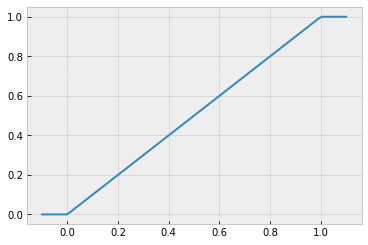

In [3]:
u = np.linspace(-0.1,1.1,100)

plt.plot(u,U.cdf(u));

The CDF of the Uniform random variable is given by:

$$F_X(x) = \begin{cases} 0 & x<a \\ \frac{x-a}{b-a} & x\in [a,b]\\ 1 & x>b \end{cases}$$

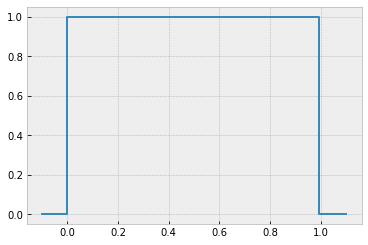

In [4]:
plt.step(u, U.pdf(u));

* A Uniform RV models continuous-valued instances that are equally likely to occur in a given interval $[a,b]$.

$$X \sim \text{Uniform}(a,b) \text{ or }$$

For short, 

$$X \sim U(a,b) $$

* The **probability density function (PDF)** of the Uniform random variable is:

$$f_X(x) = \begin{cases}\frac{1}{b-a} & x\in [a,b]\\ 0 & \text{o.w.}\end{cases}$$

* The **cumulative distribution function (CDF)** of this Uniform random variable is:

$$F_X(x) = \begin{cases} 0 & x<a \\ \frac{x-a}{b-a} & x\in [a,b]\\ 1 & x>b \end{cases}$$

___

## Exponential RV

**Used to model:** Lifetime of an electrical device, service time or time between arrivals in a queue, distance between mutations on a DNA strand, monthly and annual maximum values of daily rainfall.

* Obtainable as a limit of Geometric random variables.

* This RV has a single parameter. Typically use $\lambda$, but some books use $\mu=1/\lambda$.

* We say that $X$ is an exponential RV and write it as: 

$$X\sim \text{Exponential}(\lambda )$$

* The **probability density function (PDF)** is given as:

$$ f_X(x) = \begin{cases} \lambda e^{-\lambda x}, & x \ge 0 \\ 0, & x < 0  \end{cases} $$

or, using the $\mu=1/\lambda$ notation,

$$ f_X(x) = \begin{cases} \frac{1}{\mu} e^{-x/\mu}, & x \ge 0 \\ 0, & x < 0  \end{cases} $$

We will use the first form because it is more common and simpler.

In [5]:
?stats.expon

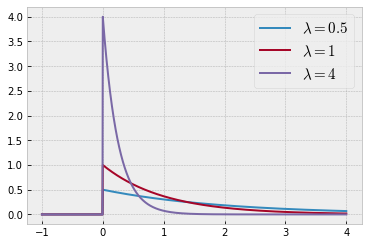

In [6]:
## Note that lambda is a keyword (private) in Python, so we should not
# use it as a variable name

z = np.linspace(-1,4,1001)

for lam in [0.5,1,4]:
    Z = stats.expon(scale=1/lam) # see the docstring for more info
    plt.plot(z, Z.pdf(z), label='$\lambda='+str(lam)+'$')
    
plt.legend(fontsize=15);

* The CDF is given as:

\begin{align*}
F_X(x) &= \int_{-\infty}^{x} f_X(u) du\\ 
&= \begin{cases}\int_0^{x} \lambda e^{-\lambda u}du & x\geq 0 \\ 0 & x<0 \end{cases}\\
&= \begin{cases} 1-e^{-\lambda x} & x\geq 0 \\ 0 & x<0 \end{cases}\\
\end{align*}

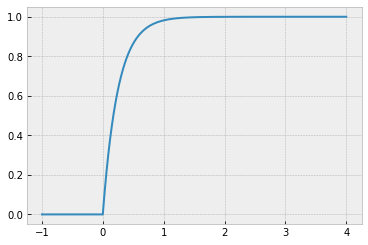

In [7]:
plt.plot(z, Z.cdf(z));

___

# Limits of RVs

## Limit of Geometric Random Variables

Let $G\sim \text{Geometric}(p)$ and $E\sim\text{Exponential}(\lambda)$, their CDFs look like:

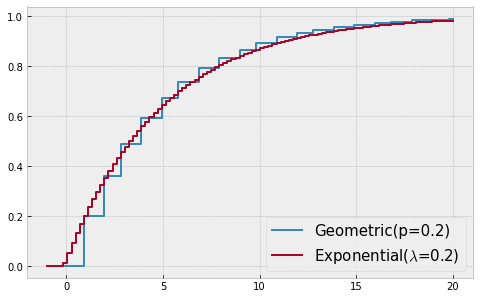

In [8]:
p=0.2
lam = 0.2
G = stats.geom(p)
E = stats.expon(scale=1/lam)
x = np.linspace(-1,20,100)

plt.figure(figsize=(8,5))
plt.step(x, G.cdf(x), label='Geometric(p=0.2)')
plt.step(x, E.cdf(x), label='Exponential($\lambda$=0.2)')
plt.legend(fontsize=15);

We can write 

$$F_G(x) = F_E(x\delta)$$ 

for all $x=1,2,\dots$, where $\delta$ is chosen so that $e^{-\lambda\delta}=1-p$.

As $\delta$ approaches zero, the exponential RV can be interpreted as the "limit" of the geometric RV.

In [9]:
delta = -np.log(1-p)/lam
delta

1.1157177565710485

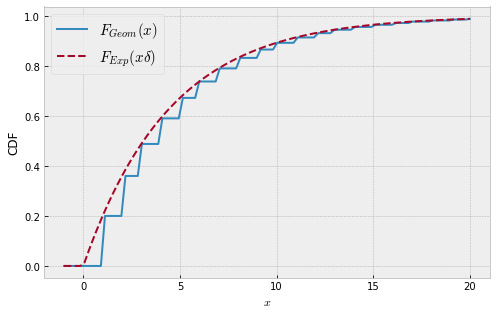

In [10]:
plt.figure(figsize=(8,5))
plt.plot(x, G.cdf(x), label='$F_{Geom}(x)$')
plt.plot(x, E.cdf(x*delta),'--', label='$F_{Exp}(x\delta)$')
plt.legend(fontsize=15); plt.xlabel('$x$'); plt.ylabel('CDF');

Suppose now that you toss a coin very quickly (every $\delta$ seconds, $\delta<<1$), a biased coin with a very small probability of Heads (equal to $p = 1 - e^{-\lambda\delta}$). Then, the first time to obtain a Heads (a geometric RV with parameter $p$) is a close approximation to an exponential RV with parameter $\lambda$, in the sense that the corresponding CDFs are very close to each other, as illustrated above.

* This relationship between the Geometric and Exponential RVs will play an important role in Bernoulli and Poisson Point processes (we will not cover these in this course).

* A Poisson point process can model events that appear to happen at a certain rate, but completely at random (without a certain structure).
    * Application example: Poisson processes to model lattice cellular networks.

## Limit of Binomial Random Variables

If the limit of properly chosen Geometric RVs is an Exponential RV, what is the limit of Binomial RVs?

Let's consider a sequence of binomial random variables with 4, 20, 40, and 200 trials. Then divide the values by 1, 5, 10 and 50, so that the values stay centered around the same range:

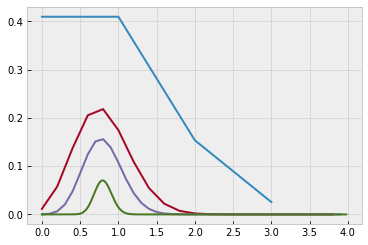

In [11]:
p = 0.2 # Probability of success in the Binomial RV

for scale in [1,5,10,50]:
    N = 4*scale # number of trials in the binomial RV
    indices = np.array(range(N))
    vals = indices/scale
    B = stats.binom(N, p)
    plt.plot(vals, B.pmf(indices));

In [12]:
from ipywidgets import interactive

In [13]:
nums = [1,2,5,10,50,100,200]
p = 0.2

def bplot(scale):
    N=4*scale
    indices = np.array(range(N))
    vals = indices/scale
    B = stats.binom(N, p)
    plt.stem(vals, B.pmf(indices))
    plt.xlim(-0.2, 3.5)
    
interactive_plot = interactive(bplot, scale=nums)

interactive_plot

interactive(children=(Dropdown(description='scale', options=(1, 2, 5, 10, 50, 100, 200), value=1), Output()), …

What do you observe?

<!-- 1. The curves become smooth and bell-shaped.

2. The width of the "bell" gets smaller as we increase the number of Bernoulli trials. -->

**Why?** 

Recall that the Binomial RV is the sum of independent Bernoulli RVs. Maybe we have a similar phenomena with other RVs?

## Limit of the Sum of Uniform RVs

In [21]:
U = {} # creates an empty dictionary

nums = [1,2,5,10,50,100,200] # number of RVs to take the average over

vals = stats.uniform.rvs(size=(100_000,nums[-1])) # generates random values from the U(0,1)
# vals is an array of size 100k-by-200

for i in nums:
    U[i] = np.sum(vals[:,0:i], axis=1)/i
    # average over i number of Uniform RVs

In [22]:
vals.shape

(100000, 200)

In [23]:
vals[:,:2].shape

(100000, 2)

In [24]:
avg=np.sum(vals[:,:2],axis=1)/i

avg.shape

(100000,)

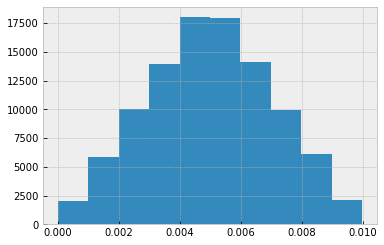

In [25]:
plt.hist(avg);

In [26]:
U

{1: array([0.79681009, 0.24016069, 0.48791517, ..., 0.74290447, 0.70069752,
        0.21904582]),
 2: array([0.61861987, 0.13141234, 0.4652285 , ..., 0.3966006 , 0.45758088,
        0.28502789]),
 5: array([0.44392437, 0.42325664, 0.59710631, ..., 0.31385157, 0.40418229,
        0.56941901]),
 10: array([0.53526203, 0.50135028, 0.57041599, ..., 0.43735907, 0.45416121,
        0.63168098]),
 50: array([0.55083556, 0.49222958, 0.52833633, ..., 0.52875018, 0.55804118,
        0.55020493]),
 100: array([0.50009392, 0.45047819, 0.51274097, ..., 0.50243847, 0.52914426,
        0.50824061]),
 200: array([0.51696379, 0.47865864, 0.52900036, ..., 0.52199326, 0.52633858,
        0.48950601])}

In [27]:
U[3] # There's no key with value 3

KeyError: 3

In [28]:
U.keys()

dict_keys([1, 2, 5, 10, 50, 100, 200])

In [29]:
U[1]

array([0.79681009, 0.24016069, 0.48791517, ..., 0.74290447, 0.70069752,
       0.21904582])

In [30]:
def uplot(n):
    plt.hist(U[n], bins=30)
    plt.xlim(-0.1,1.1)
    
interactive_plot = interactive(uplot, n=nums)
interactive_plot

interactive(children=(Dropdown(description='n', options=(1, 2, 5, 10, 50, 100, 200), value=1), Output()), _dom…

## Limit of the Sum of Exponential RVs

In [31]:
E = {} # creates an empty dictionary

nums = [1,2,5,10,50,100,200,1000] # number of RVs to take the average over

vals = stats.expon(scale=1/1).rvs(size=(100_000,nums[-1])) # generates random values from the Exp(lambda=1)
# vals is an array of size 100k-by-200

for i in nums:
    E[i] = np.sum(vals[:,0:i], axis=1)/i
    # average over i number of Exponential RVs

def eplot(n):
    plt.hist(E[n], bins=30)
    plt.xlim(-0.05, 10)
    
interactive_plot = interactive(eplot, n=nums)
interactive_plot

interactive(children=(Dropdown(description='n', options=(1, 2, 5, 10, 50, 100, 200, 1000), value=1), Output())…

Fascinating! The average of RVs (themselves without a bell-shaped distribution) will approach a bell-shaped distribution as the number of RVs increases!

This bell-shaped distribution is known as the **Gaussian random variable** and it has very important properties such as the **Central Limit Theorem (CLT)**.

# Central Limit Theorem

<div class="alert alert-info">
    <b>Central Limit Theorem</b>
    
The **Central Limit Theorem (CLT)** says (very roughly) that the **average** of a large number of almost *any* type of random variables will have the same type of distribution, called the **Gaussian** distribution.
    
</div>

More formally, if $X_i, i=1,2,\dots, N$, is a sequence of independent random variables with finite variance (to be defined later), then the distribution function of

$$\overline{X} = \lim_{n\longrightarrow\infty} \frac{1}{n} \sum_{i=1}^n X_i$$

The distribution for $\overline{X}$ is called **Gaussian**.

The density function for a Gaussian random variable has a somewhat complicated form:

$$f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp \left\{ - \frac{(x-\mu)^2}{2\sigma^2} \right\},$$

with parameters $\mu$ and $\sigma^2 \ge 0$. 

* The parameter $\mu$ is called the **mean** of the Gaussian distribution.
* The parameter $\sigma^2$ is called the **variance** of the Gaussian distribution.
* The parameter $\sigma$ is called the **standard deviation** of the Gaussian distribution.

* Sometimes the term **Normal** distribution is used to refer to the Gaussian random variable that has parameters $\mu=0$ and $\sigma^2=1$, so we will use the term Gaussian to refer to any random variable with this density function. 

(Also, "Gaussian" is more common in ECE. "Normal" is more common in Statistics and Math.)

In [4]:
?stats.norm

In [5]:
# Normal aka G(0,1)
G1 = stats.norm(loc=0, scale=1)

# Gaussian(10,variance=3)
G2 = stats.norm(loc=10, scale=np.sqrt(3))


# Gaussian(-5,0.3)
G3 = stats.norm(loc=-5, scale=np.sqrt(0.3))



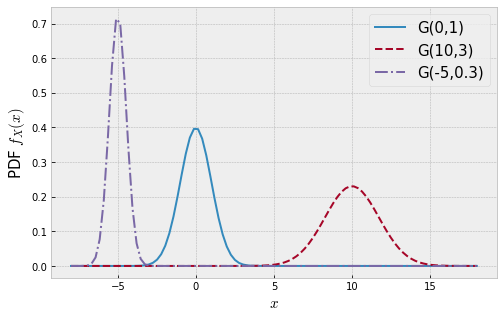

In [6]:
plt.figure(figsize=(8,5))
x = np.linspace(-8,18,100)
plt.plot(x, G1.pdf(x), label='G(0,1)')
plt.plot(x, G2.pdf(x), '--', label='G(10,3)')
plt.plot(x, G3.pdf(x), '-.', label='G(-5,0.3)')
plt.legend(fontsize=15)
plt.xlabel('$x$', size=15)
plt.ylabel('PDF $f_X(x)$', size=15);

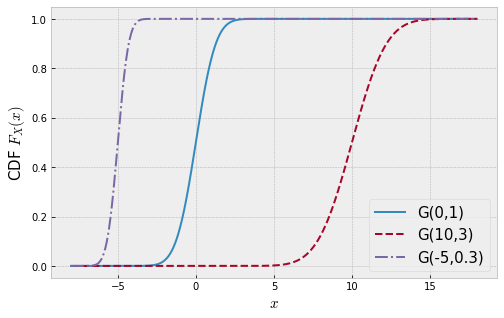

In [7]:
plt.figure(figsize=(8,5))
x = np.linspace(-8,18,1000)
plt.plot(x, G1.cdf(x), label='G(0,1)')
plt.plot(x, G2.cdf(x), '--', label='G(10,3)')
plt.plot(x, G3.cdf(x), '-.', label='G(-5,0.3)')
plt.legend(fontsize=15)
plt.xlabel('$x$', size=15)
plt.ylabel('CDF $F_X(x)$', size=15);

___

# Properties of Probability Density Functions (PDFs)

### Property 1

$$F_X(x) = \int_{-\infty}^x f_X(t)~dt$$

**Proof:** From the Fundamental Theorem of Calculus.

### Property 2

$$f_X(x) \geq 0, -\infty < x < \infty$$

**Proof:** $F_X(x)$ is nondecreasing.

### Property 3

$$\int_{-\infty}^{\infty} f_X(t)dt = 1$$

**Proof:** $\int_{-\infty}^{\infty} f_X(t)dt = F_X(\infty) = 1$ (from above)

### Property 4

$$P(a < X \leq b) = \int_a^b f_X(x)~dx$$

where $ a\leq b$.

**Proof:** 

\begin{align*}
P(a < X \leq b) &= F_X(b) - F_X(a) \\
&= \int_{-\infty}^b f_X(x)~dx - \int_{-\infty}^a f_X(x)~dx \\
&= \int_a^b f_X(x)~dx
\end{align*}

### Property 5

If $g(x)$ is a nonnegative piecewise continuous function with finite integral

$$\int_{-\infty}^{\infty} g(x)~dx = c, -\infty<x<\infty$$

then $f_X(x) = \frac{g(x)}{c}$ is a valid pdf.

**Proof:** omitted.

* Note that if $f_X(x)$ exists at $x$, then $F_X(x)$ is continuous at $x$ and thus

\begin{align*}
P(X = x) = F_X(x) - F_X(x^-) = 0
\end{align*}

* Recall that this does not mean that $x$ never occurs, but that the occurrence is extremely unlikely.

___

# Gaussian Random Variable

The CDF of a Gaussian RV is given by

\begin{align*}
F_X(x) &= P(X \leq x) \\
&= \int_{-\infty}^x \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left\{-\frac{(t-\mu)^2}{2\sigma^2}\right\}} dt
\end{align*}

which cannot be evaluated in closed form.

Instead, we tabulate distribution functions for a normalized Gaussian variable with $\mu=0$ and $\sigma^2=1$.

* This is called the **Normal distribution**, and its CDF is

\begin{align*}
\Phi(x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}}\exp{\left\{-\frac{t^2}{2}\right\}} dt
\end{align*}

## $\operatorname{Q}$-Function

When working with Gaussian probabilities analytically, we express these probabilities in terms of standard functions:
* $\Phi (x)$ is the CDF of a Gaussian(0,1) random variable
* $\operatorname{Q}(x)=1- \Phi(x)$ is the survival function of a Gaussian(0,1) random variable

Because $\Phi(x) + \operatorname{Q}(x) = 1$, it is sufficient to tabulate one of these. **See the Q-Function** table pushed to today's lecture materials.

From above,
\begin{align*}
\Phi(x)= \int_{-\infty}^{x} \frac{1}{\sqrt{2 \pi}} \exp \left\{ - \frac{t^2}{2} \right\}dt
\end{align*}
    
and 

\begin{align*}
\operatorname{Q}(x)= \int_{x}^{\infty} \frac{1}{\sqrt{2 \pi}} \exp \left\{ - \frac{~t^2}{~2~} \right\}dt
\end{align*}

The CDF and survival function for a Gaussian$(\mu,\sigma^2)$ random variable are
\begin{align*}
F_X(x) = \Phi \left(\frac{x-\mu}{\sigma} \right)
\end{align*}

and

\begin{align*}
S_X(x) = \operatorname{Q} \left(\frac{x-\mu}{\sigma} \right)
\end{align*}

<div class="alert alert-danger">
    Note that the denominator above is $\sigma$, not $\sigma^2$. Many students use the wrong value when solving problems!
</div>

* To find the probability of some interval using the $Q$-function, it is easiest to rewrite the probability:

\begin{align*}
P(a < X \leq b) &= P(X > a) - P(X > b) \\
&= Q\left(\frac{a-\mu}{\sigma}\right) - Q\left(\frac{b-\mu}{\sigma}\right)
\end{align*}

* In general, Gaussian probabilities can always be expressed in terms of "tail" probabilities

## More on Computing Gaussian Tail Probabilities

Any Gaussian probabilities can be decomposed in terms of Gaussian tail probabilities. There are 2 cases of the tail probabilities:

* **Case 1:** $P(X \geq a)$, where $a>\mu$

\begin{align*}
P(X \geq a) = Q\left(\frac{a-\mu}{\sigma}\right)
\end{align*}

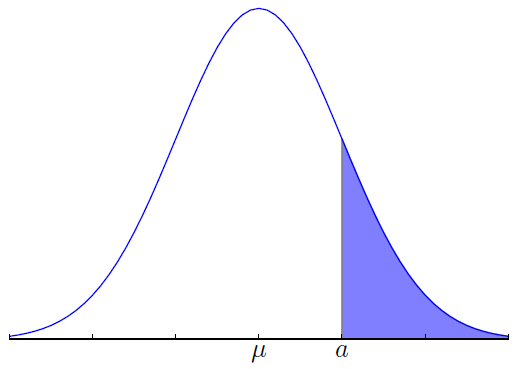

In [1]:
from IPython.display import Image
Image('figures/probXlargerA.png', width=400)

* **Case 2:** $P(X \leq b)$, where $b<\mu$

By symmetry:

\begin{align*}
P(X \geq \mu + (\mu - b)) = P(X \geq 2\mu - b) = Q\left(\frac{2\mu - b - \mu}{\sigma}\right) = Q\left(\frac{\mu-b}{\sigma}\right)
\end{align*}

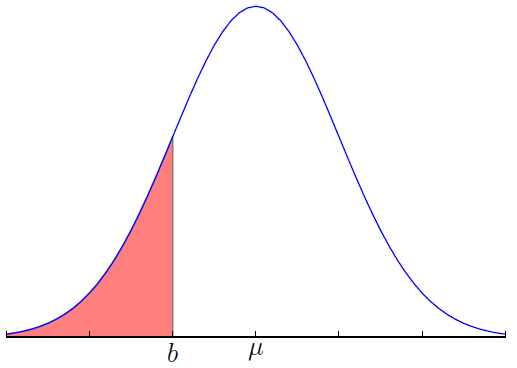

In [2]:
Image('figures/probXsmallerB.png', width=400)

___

___

In [2]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Example: Grading on a curve

A professor's classroom requests that she "grades on a curve". The professor sees that the class grades can be modeled using a Gaussian distribution with parameters $\mu$ and $\sigma^2$.

Let $X$ represent a randomly chosen student's grade.

**(a) What is the probability that the student's grade is above $\mu$?**

$P(X > \mu) = Q\left(\frac{\mu - \mu}{\sigma}\right) = Q\left(\frac{0}{\sigma}\right) = \frac{1}{2}$

**(b) The professor decides to use the following grading strategy:**

* If the grades are more than $\sigma$ above the mean, assign an A

* If the grades are within $\sigma$ of the mean ($\mu$), assign a B

* If the grades are more than $\sigma$ below the mean, but less than $2\sigma$ below the mean, assign C

* If the grades are more than $2\sigma$ below the mean, but less than $3\sigma$ below the mean, assign D

* If the grades are more than $3\sigma$ below the mean, assign E

Determine the probability that a randomly chosen student gets each grade.

\begin{align*}
P(A) &= P(X \geq \mu + \sigma) = Q\left(\frac{\mu + \sigma - \mu}{\sigma}\right) = Q(1)\\
P(B) &= P(\mu -\sigma < X < \mu + \sigma) = 1 - 2P(X > \mu + \sigma) = 1 - 2 Q\left(\frac{\mu+\sigma-\mu}{\sigma}\right) = 1 - 
2 Q(1)\\
P(C) &= P(\mu - 2\sigma < X < \mu - \sigma) = P(X \geq \mu - 2\sigma) - P(X \geq \mu - \sigma) = Q(1) - Q(2)\\
P(D) &= P(\mu - 3\sigma < X < \mu - 2\sigma) = P(X \geq \mu - 3\sigma) - P(X \geq \mu - 2\sigma) = Q(2) - Q(3)\\
P(E) &= P(X < \mu - 3\sigma) = P(X > \mu + 3\sigma) = Q(3)
\end{align*}

In [3]:
?stats.norm

In [4]:
def q(x):
    # by default stats.norm creates a Gaussian(0,1)
    return stats.norm.sf(x)

In [5]:
pA = q(1)
pA

0.15865525393145707

In [6]:
pB =1-2*q(1)
pB

0.6826894921370859

In [7]:
pC=q(1)-q(2)
pC

0.13590512198327787

In [8]:
pD=q(2)-q(3)
pD

0.0214002339165491

In [10]:
pE=q(3)
pE

0.0013498980316300933

Checking work:

In [11]:
pA+pB+pC+pD+pE

1.0

**(c) Suppose the threshold to get an A is $k\sigma$ above the mean, what value of $k$ is needed for 40% of the class to get an A?**

\begin{align*}
P(X \geq \mu + k\sigma) &= 0.4 \\
Q\left(\frac{\mu + k\sigma - \mu}{\sigma}\right) &= 0.4 \\
Q(k) &= 0.4 \\
k &= Q^{-1}(0.4) \\
k &\approx 0.25 \text{ (using Q-function table)} 
\end{align*}

In [12]:
?stats.norm

In [13]:
def qinv(x):
    return stats.norm.isf(x)

In [14]:
qinv(0.4)

0.2533471031357997

___

# Expected Value

Consider again a set of observations $x_1, x_2, \dots, x_N$.

Then the **average** of the data is 

\begin{align*}
\overline{x} = \frac{1}{N} \sum_{i=1}^N x_i
\end{align*}

* We would like to define a similar notion for a random variable $X$, but take the average over the *ensemble* of potential values of $X$.

* This value is the *expected value*, *ensemble mean*, or simply *mean* of $X$.

* We can use *relative frequency* to connect the two.

Suppose that $X=\{x_i\}_{i=1}^n$ are random data that take values from $S_k=\{a_1,a_2,\dots,a_k\}$, where $k<\infty$.

\begin{align*}
\overline{X} = \frac{1}{N} \sum_{i=1}^N x_i
\end{align*}

Let $n_j \equiv$ \# of times $a_i$ occurs, then 

\begin{align*}
\overline{X} = \frac{1}{N} \sum_{j=1}^N a_j \cdot n_j = \sum_{j=1}^N a_j \cdot \frac{n_j}{N}
\end{align*}

If our experiment possesses statistical regularity,

\begin{align*}
\lim_{n\rightarrow\infty} \frac{n_j}{N} \rightarrow p_j = P(a_j)
\end{align*}

Therefore,

\begin{align*}
\lim_{n\rightarrow\infty} \overline{X} = \sum_{j=1}^N a_j \cdot p_j \triangleq E[X]
\end{align*}

<div class="alert alert-info">
    <b>Expected Value</b>
    
The **expected value** or **mean** of a random variable $X$ is
    
\begin{align*}
\mu_X= E[X] = \sum_x x p_X(x),
\end{align*}
    
if $X$ is a **discrete random variable**, and is defined as
    
\begin{align*}
\mu_X = E[X] = \int_{-\infty}^{\infty} xf_X(x)~dx,
\end{align*}
    
if $X$ is a **continuous random variable**.

**Note:** In some special cases, we would not define the expected value because it is of the form $-\infty$, $+\infty$. We won't cover those in this class.
</div>

## Why do we care about the mean?

In a repeated experiment, the limit of the average value is the mean
* In fact, we will show that we can determine a limit on the number of times the experiment must be repeated to ensure that the average is within a range around the mean with a specified probability (Chebyshev's inequality, covered later)
    
If we wish to use a constant value to estimate a random variable, then the mean is the value that minimizes the mean-square error.

Note that $E[X]$ may be infinite.

**<font color=blue>Example 1:</font>** Rolling a fair 6-sided die.

Let $X$ be the number of top face of die.

\begin{align*}
E[X] &= \sum_{i=1}^6 i \times P(X=i)\\
&= \sum_{i=1}^6 i \times\frac{1}{6}\\
&= \frac{21}{6}\\
&= 3.5
\end{align*}

**<font color=blue>Example 2:</font>** Bernoulli RV.

Let $X \sim \text{Bernoulli}(p)$, then $p_X(x) = \begin{cases} p & x=1\\ 1-p & x=0 \\ 0 & \text{o.w.}  \end{cases}$

\begin{align*}
E[X] = (0)(1-p) + (1)(p) = p
\end{align*}

**<font color=blue>Example 3:</font>** What is the expected value of the random variable $X\sim U(1,6)$?

Let $X\sim U(1,6)$, then $f_X(x) = \begin{cases} \frac{1}{6-1}, & x\in [1,6]\\ 0, & \text{o.w.} \end{cases}= \begin{cases} \frac{1}{5}, & x\in [1,6]\\ 0, & \text{o.w.} \end{cases}$

\begin{align*}
E[X] &= \int_{-\infty}^{\infty} xf_X(x)dx = \int_1^6 x\frac{1}{5}dx = \frac{x^2}{10}\Big|_1^6 = \frac{6^2}{10} - \frac{1^2}{10} = \frac{35}{10} = 3.5
\end{align*}

Analytically, we have:

\begin{align*}
E[X] = \int_{-\infty}^{\infty} uf_U(u)~du = \int_1^6 u\frac{1}{6-1}~du = \frac{1}{10}u^2 \Big|_1^6 = 3.5
\end{align*}

**<font color=blue>Example 1:</font>** What is the expected value of the random variable $X\sim U(1,6)$?

In [8]:
?stats.uniform

In [3]:
U = stats.uniform(loc=1, scale=5) # U(1,6)

In [5]:
# sample random values from this RV

U.rvs(size=10)

array([1.63469076, 4.45909537, 3.65881116, 5.96265165, 4.32014086,
       4.07811587, 4.00942049, 1.73724616, 2.41349065, 1.33797525])

In [6]:
U.rvs(size=10).mean()
 #average for 10 random values for the U(1,6)

3.181556747641314

In [7]:
# Expected value

U.mean()

3.5

In [10]:
U.stats('mv')

(array(3.5), array(2.08333333))

**<font color=blue>Example 2:</font>** What is the expected value of the random variable $X\sim \text{Exp}(\lambda)$?

In [11]:
lam = 1

E = stats.expon(scale=1/lam)

E.mean()

1.0

In [12]:
E.stats('m')

array(1.)

Analytically:

\begin{align*}
E[X] = \int_0^{\infty} x \lambda e^{-\lambda x}~dx =\lambda \int_0^{\infty} x e^{-\lambda x}~dx
\end{align*}

Need to apply integral by parts.

___

# Important Properties of the Expected Value

## Property 1 - Linearity

Expected value is a **linear operator**. If $X$ and $Y$ are random variables, and $a$ and $b$ are arbitrary constants, then

\begin{align*}
E[aX + bY] = aE[X] + bE[Y]
\end{align*}

*Note that this does not required that $X$ and $Y$ be independent.*

___

**<font color=blue>Example 4:</font>** Expected Value of a Binomial RV.

Let $B_i$, $i=1,2,\cdots, N$ be a sequence of independent Bernoulli random variables with common parameter $p$. Then

\begin{align*}
X=\sum_{i=1}^N B_i
\end{align*}

is a $\text{Binomial}(N,p)$ random variable.

Using the linearity property,

\begin{align*}
E[X] &= E\left[ \sum_{i=1}^N B_i\right]\\
&= \sum_{i=1}^N E[B_i]\\
&= \sum_{i=1}^N p\\
&= Np
\end{align*}

We can also derive the same result from the PMF of a Binomial RV, but it is *way* more complicated:

\begin{align*}
E[X] = \sum_{n=0}^N n\binom{N}{n} p^n q^{N-n}
\end{align*}

(Left as exercise.)

___

## Property 2 - Expected Value of a Function

If $Y=g(X)$, it is not necessary to compute the PDF or CDF of $Y$ to find its expected value. We can find it using $X$:

\begin{align*}
E[Y] = \int_{-\infty}^{\infty} g(x) f_X(x)~dx
\end{align*}

This is sometimes known as the **Law of the Unconscious Statistician (LOTUS)**.

## Property 3 - Expected Value of a Scalar

The expected value of a scalar constant $c$ is $E[c] = c$.

Let $g(x) = c$, then:

\begin{align*}
E[c] &= \int_{-\infty}^{\infty} c f_X(x)~dx\\
&= c \int_{-\infty}^{\infty} f_X(x)~dx\\
&= c
\end{align*}

* Note that $E[f(X)] \neq f(E[X])$.

___

**<font color=blue>Example 6:</font>** Recall that if $x_i$ are samples drawn from a random variable $X$, then

\begin{align*}
\lim_{N\rightarrow\infty} \frac{1}{N} \sum_{i=1}^N x_i = E[X]
\end{align*}

This is the result from the **Central Limit Theorem (CLT)**.

Let's create a Uniform random variable object using ```scipy.stats```. Draw 10,000 sample values from it, and use the sample values to estimate $(E[U])^2$ and $E[U^2]$.

In [59]:
U =stats.uniform() # U(0,1)

In [60]:
N=10_000

samples = U.rvs(size=N)

In [61]:
# (E[U])**2

np.mean(samples)**2

0.2428965754561222

In [62]:
# E[U**2]

np.mean(samples**2)

0.32688867502773045

___

# Moments of a Random Variable

<div class="alert alert-info">
    <b>Moments</b>
    
The **moments** of a random variable (or of its distribution) are *expected values of powers* or related functions of the random variable.

The $n$-th moment of a **continuous** RV $X$ is 

\begin{align*}
E[X^n] = \int_x t^n f_X(t)~dt
\end{align*}

The $n$-th moment of a **discrete** RV $X$ is 
    
\begin{align*}
E[X^n] = \sum_x x^n p_X(x)
\end{align*}

* In particular, the first moment is the *mean*, $\mu_X = E[X]$.
</div>

<div class="alert alert-info">
    <b>Central Moments</b>
    
The **central moments** of a random variable (or of its distribution) are *expected values of mean-centered powers* or related functions of the random variable.

The $n$-th central moment of RV $X$ is $E[(X - \mu_X)^n]$, in general, $E[(X - E[X])^n]$.
    
If $X$ is a **continuous** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \int_x (t-\mu_X)^n f_X(t)~dt
\end{align*}
    
If $X$ is a **discrete** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \sum_x (x-\mu_X)^n p_X(x)
\end{align*}
</div>

* Moments of a random variable are expected values of the random variable raised to some power.

* For a *central moment*, the mean is subtracted from the random variable before it is raised to a power.

Because different powers spread the values of the random variable in different ways, **moments can provide additional information about a random variable other than the mean value**:

In mathematics, a moment is a specific quantitative measure of the shape of a function. The most important ones are: 

1. **Mean**, the 1st moment

2. **Variance**, the 2nd central moment 

3. **Skewness**, the 3rd central moment 

4. **kurtosis**, the 4th central moment

**Variance is the second central moment** and provides a measure of how much the probability density or mass of random variable is spread away from the mean. We define it as:

\begin{align*}
Var[X] &= E[(X-\mu_X)^2]\\
&= E[X^2 - 2\mu_X X + \mu_X^2] \\
&= E[X^2] - 2\mu_XE[X] + \mu_X^2 \\
&= E[X^2] - 2E[X]E[X] + (E[X])^2 \\
&= E[X^2] - (E[X])^2
\end{align*}

So,

\begin{align*}
Var[X] = E[X^2] - (E[X])^2
\end{align*}

This latter formula is usually a more convenient way to find the variance.

* The variance of a Gaussian random variable is the parameter $\sigma^2$ (you can get it through integration by parts or some clever manipulation).

We can compute the most common moments of a random variable using the ```stats``` module:

In [3]:
G = stats.norm(loc=0,scale=1) # G(0,1)

G.stats('mvsk'), G.median()

((array(0.), array(1.), array(0.), array(0.)), 0.0)

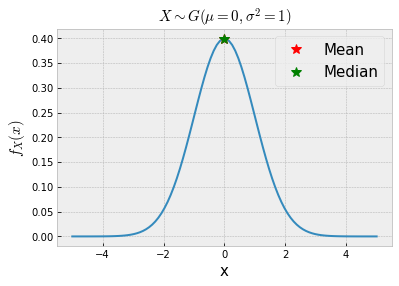

In [5]:
G = stats.norm(loc=0,scale=1)
x = np.linspace(-5,5,100)
plt.plot(x,G.pdf(x))
plt.plot(G.stats('m'), G.pdf(G.stats('m')), '*r', markersize=10, label='Mean')
plt.plot(G.median(), G.pdf(G.median()), '*g',markersize=10, label='Median')
plt.legend(fontsize=15)
plt.title('$X\sim G(\mu=0,\sigma^2=1)$',size=15)
plt.xlabel('x',size=15)
plt.ylabel('$f_X(x)$',size=15);

In [6]:
lam=0.5
E =stats.expon(scale=1/lam)

E.stats('mvsk'), E.median()

((array(2.), array(4.), array(2.), array(6.)), 1.3862943611198906)

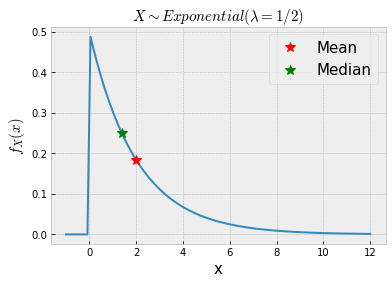

In [7]:
x = np.linspace(-1,12,100)
plt.plot(x,E.pdf(x))
plt.plot(E.stats('m'), E.pdf(E.stats('m')), '*r', markersize=10, label='Mean')
plt.plot(E.median(), E.pdf(E.median()), '*g', markersize=10, label='Median')
plt.legend(fontsize=15)
plt.title('$X\sim Exponential(\lambda=1/2)$',size=15)
plt.xlabel('x',size=15)
plt.ylabel('$f_X(x)$',size=15);

In [8]:
Bn = stats.binom(15, 0.9)

Bn.stats('mvsk'), Bn.median()

((array(13.5), array(1.35), array(-0.68853037), array(0.34074074)), 14.0)

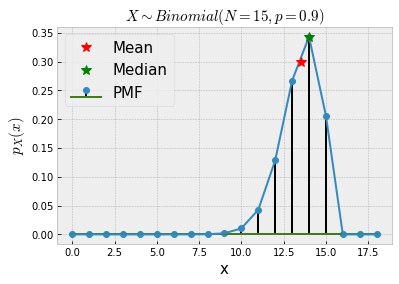

In [9]:
x = range(19)
plt.stem(x,Bn.pmf(x),'k',label='PMF')
plt.plot(x, Bn.pmf(x))
plt.plot(Bn.stats('m'), 0.3, '*r', markersize=10, label='Mean')
plt.plot(Bn.median(), Bn.pmf(Bn.median()), '*g', markersize=10, label='Median')
plt.legend(fontsize=15)
plt.title('$X\sim Binomial(N=15,p=0.9)$',size=15)
plt.xlabel('x',size=15)
plt.ylabel('$p_X(x)$',size=15);

___

# Distribution of Binary Hypothesis

In binary hypothesis testing, we built statistics that access a specific moment of the distribution (mean-difference, median-difference, etc.). We can also consider a full distribution for our hypotheses.

That is, we will be conditioning random variables depending on which hypothesis is true: $f_X(x|H_0)$ or $f_X(x|H_1)$.

In general, there are multiple ways in which random variables can depend on events or on other random variables.

We consider the same type as above: there is dependence between a random variable and some event, such that the distribution of the random variable is known if the event is known.

### <font color=blue>Motivating Case Study: Binary Communications</font>

In a binary communication system, the received signal is a noisy version of the transmitted signal. 

In the presence of thermal noise, the
  received signal can be modeled as $X= s_i + N$, where: 
* $s_i \in \{-1, 1\}$ depends on which signal is transmitted (1 or 0), and
* $N$ is a Gaussian random variable with mean 0 and variance $\sigma^2 $, which determines the signal-to-noise ratio

Thus, the received signal has a conditional distribution, depending on which signal
  is transmitted:
\begin{align*}
  \begin{cases}
  X  \sim \mbox{Gaussian}(+1,\sigma^2), & 0 \mbox{ transmitted}\\
  X  \sim \mbox{Gaussian}(-1,\sigma^2), & 1 \mbox{ transmitted}
  \end{cases}
\end{align*}

(Here only the mean changes and not the variance, but this is an accurate
  model of what happens in most binary communication systems.)

We can write the conditional density and distribution functions given that $i$ was transmitted as $f_X(x|i~\mbox{Tx})$ and $F_X(x|i~\mbox{Tx})$.

**<font color=blue>Example 1</font>** Let $T_i$ denote the event that $i$ is transmitted. Calculate the probability that $X>2$ if $P(T_0)=0.25$, $P(T_1)=0.75$ and $\sigma^2=4$.

We can easily solve this problem using what we already know about conditional probability and Gaussian random variables:

\begin{align*}
P(X>2) &= P(X>2|T_0)P(T_0) + P(X>2|T_1)P(T_1) ~\mbox{, by Total Probability}\\
&= Q\left(\frac{2-1}{\sigma} \right)(0.25) +
Q\left(\frac{2-(-1)}{\sigma} \right)(0.75) \\
&= Q\left(\frac{1}{2} \right)(0.25) +
Q\left(\frac{3}{2} \right)(0.75) \\
&\approx 0.127
\end{align*}

In [11]:
#stats.norm.sf() is the Q(x)-function

stats.norm.sf(0.5)*0.25 + stats.norm.sf(3/2)*0.75

0.12723978563314026

**<font color=blue>Example 2</font>** Calculate the probability of error if the decision rule is:

\begin{align*}
\begin{cases} \hat{T}_0, & X \ge 0\\ \hat{T}_1, & X<0, \end{cases}
\end{align*}

where $\hat{T}_i$ denotes deciding that $i$ was transmitted. Provide a numerical answer when $\sigma^2=0.1$ and $P(T_0)=P(T_1)=\frac{1}{2}$.

\begin{align*}
P(E) &= P(X\ge 0 \cap T_1) + P(X<0 \cap T_0) \\
&= P(X \ge 0 \vert T_1)P(T_1) + P(X<0 \vert T_0) P(T_0)\\
&= Q\left(\frac{0-(-1)}{\sigma}\right) P(T_1) + Q\left(\frac{1-0}{\sigma} \right) P(T_0) \\
&= Q\left(\frac{1}{\sigma}\right)\\
&\approx 0.00078
\end{align*}

In [14]:
stats.norm.sf(1/np.sqrt(0.1))

0.000782701129001274

Note that, if the variance of the Gaussian noise $\sigma^2$ was larger, we would have a larger amount of overlap between the two distributions and hence make more errors.

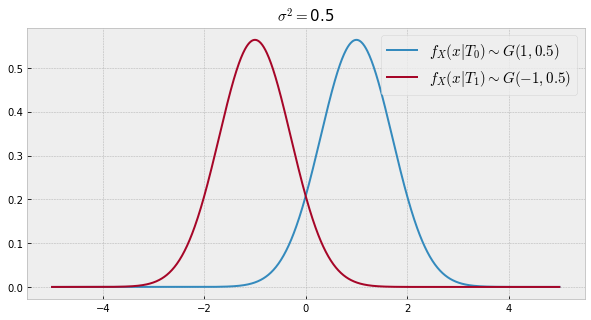

In [21]:
sigma_sq = 0.5

G_T0 = stats.norm(loc=1,scale=np.sqrt(sigma_sq))
G_T1 = stats.norm(loc=-1, scale=np.sqrt(sigma_sq))

x = np.linspace(-5,5,1000)

plt.figure(figsize=(10,5))
plt.plot(x, G_T0.pdf(x), label='$f_X(x|T_0)\sim G(1,'+str(sigma_sq)+')$')
plt.plot(x, G_T1.pdf(x), label='$f_X(x|T_1)\sim G(-1,'+str(sigma_sq)+')$')
plt.legend(fontsize=15)
plt.title('$\sigma^2=$'+str(sigma_sq), size=15);

___

# Optimal Decisions

Now suppose that we want to make an optimal decision $\hat{T}_i$ based on observing the value of $X$ at the output of the receiver. I.e., given that we have $X=x$ for some value $x$.

The MAP rule is to choose the most probable value that was transmitted given the observation. So, that corresponds to:

* If $P(T_0 \vert X=x) \ge P(T_1 \vert X=x)$, decide 0
* If $P(T_1 \vert X=x) > P(T_0 \vert X=x)$, decide 1

and by the definition of conditional probability

\begin{align*}
P(T_0|X=x) = \frac{P(T_0 \cap X=x)}{P(X=x)}
\end{align*}

<div class="alert alert-danger">
    But both the numerator and denominator are 0, because $X$ is a continuous random variable!
</div>

to be continued...